<a name="cell-TOC-Sampling"></a> 

0. [Syllabus](#cell-syllabus)

1. [Sampling](#cell-pythonlibs)

    1. [Inverse CDF Sampling](#cell-Sampling-InverseCDF)
    2. [Rejection Sampling](#cell-rejectionSampling)
    3. [Importance Sampling](#cell-importanceSampling)
    

<a name="cell-pythonlibs"></a>

# 1. [`random`](https://docs.python.org/3/library/random.html), [`numpy`](https://numpy.org/doc/stable/user/whatisnumpy.html) and  [`scipy.stats`](https://scipy.github.io/devdocs/tutorial/stats.html) ([Return to TOC](#cell-TOC-Sampling))

---

- [`random`](https://docs.python.org/3/library/random.html): "Mersenne Twister" (MT19937)  
    - see more in<br>"[Extra Reading: Pseudorandomnes and Floating-point numbers](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week1/STA410_W24_Week1_Extra_PseudorandomnesAndComputerRepresentation.ipynb)"<br>from  the [course GitHub repo](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/README.md)
    
- <font style="color:white;">[np.random]: "PCG64 has better statistical properties than MT19937"</font>
    - <font style="color:white;">MT19937 nonetheless [still available]</font>

> <font style="color:white;">[RNG] *Pseudorandomness* is </font>
> - <font style="color:white;">based on "bit shuffling" </font>
> - <font style="color:white;">pleasantly [comprehensive] </font> 
> - <font style="color:white;">not *true* ([random.org] style) *Randomness...* </font>




<a name="cell-pythonlibs"></a>

# 1. [`random`](https://docs.python.org/3/library/random.html), [`numpy`](https://numpy.org/doc/stable/user/whatisnumpy.html) and  [`scipy.stats`](https://scipy.github.io/devdocs/tutorial/stats.html) ([Return to TOC](#cell-TOC-Sampling))

---

- [`random`](https://docs.python.org/3/library/random.html): "Mersenne Twister" (MT19937)  
    - see more in<br>"[Extra Reading: Pseudorandomnes and Floating-point numbers](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week1/STA410_W24_Week1_Extra_PseudorandomnesAndComputerRepresentation.ipynb)"<br>from  the [course GitHub repo](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/README.md)
    
- [`np.random`](https://numpy.org/doc/stable/reference/random/#quick-start): "PCG64 has better statistical properties than MT19937"
    - MT19937 nonetheless [still available](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html)

> <font style="color:white;">[RNG] *Pseudorandomness* is </font>
> - <font style="color:white;">based on "bit shuffling" </font>
> - <font style="color:white;">pleasantly [comprehensive] </font> 
> - <font style="color:white;">not *true* ([random.org] style) *Randomness...* </font>




<a name="cell-pythonlibs"></a>

# 1. [`random`](https://docs.python.org/3/library/random.html), [`numpy`](https://numpy.org/doc/stable/user/whatisnumpy.html) and  [`scipy.stats`](https://scipy.github.io/devdocs/tutorial/stats.html) ([Return to TOC](#cell-TOC-Sampling))

---

- [`random`](https://docs.python.org/3/library/random.html): "Mersenne Twister" (MT19937)  
    - see more in<br>"[Extra Reading: Pseudorandomnes and Floating-point numbers](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week1/STA410_W24_Week1_Extra_PseudorandomnesAndComputerRepresentation.ipynb)"<br>from  the [course GitHub repo](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/README.md)
    
- [`np.random`](https://numpy.org/doc/stable/reference/random/#quick-start): "PCG64 has better statistical properties than MT19937"
    - MT19937 nonetheless [still available](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html)

> [RNG](https://scipy.github.io/devdocs/tutorial/stats.html#random-number-generation) ***Pseudorandomness*** is 
> - based on "bit shuffling" 
> - pleasantly [comprehensive](https://docs.scipy.org/doc/scipy/reference/stats.html) 
> - not *true* ([random.org](https://www.random.org) style) *Randomness...* 




<a name="cell-Sampling-InverseCDF"></a>

# 1.A Inverse CDF Sampling ([Return to TOC](#cell-TOC-Sampling))

## A little quiz...

<table>
<tr><th>1. What is this picture doing?</th><th>$\quad\;\;$2. And what is this code doing?</th></tr>
<tr>
<td>

![](https://upload.wikimedia.org/wikipedia/commons/c/cc/Inverse_Transform_Sampling_Example.gif)

</td>
<td> 
    
```python
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

support = np.linspace(0,10,100)
n,X = 10000,stats.gamma(a=3)
    
u = stats.uniform.rvs(size=n)
x = X.ppf(u)

plt.hist(X.ppf(u), density=True, bins=100)
plt.plot(support, X.pdf(support))
```

</td>
</tr>
</table>

<br><br>

# 1.A Inverse CDF Sampling 


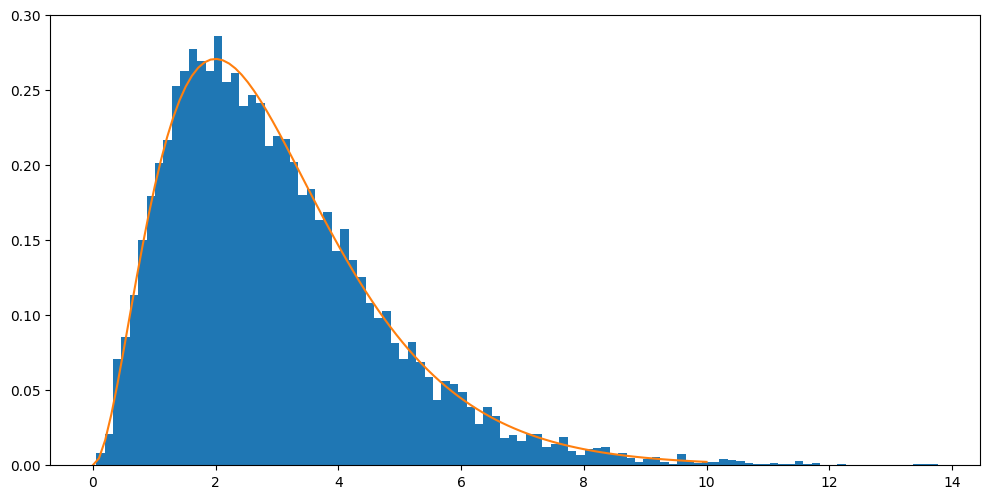

In [2]:
from scipy import stats; import numpy as np; import matplotlib.pyplot as plt
support = np.linspace(0,10,100); n,X = 10000,stats.gamma(a=3)
    
u = stats.uniform.rvs(size=n); x = X.ppf(u)
plt.figure(figsize=(12,5.85)); plt.hist(X.ppf(u), density=True, bins=100); plt.plot(support, X.pdf(support));



# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$

<font style="color:white;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & \color{white}{= {}   \overset{\text{If the inverse exists...}}{\overset{\text{Let }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}} }\\
& \color{white}{= {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) = F_X(x) } \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \color{white}{\;\;\;\Longrightarrow \quad F_X^{-1}(U_i) \sim f_\theta(x) }
\end{align*}$$

> <font style="color:white;">Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*</font>




# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$ 

<font style="color:gray;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & \color{white}{= {}   \overset{\text{If the inverse exists...}}{\overset{\text{Let }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}} }\\
& \color{white}{= {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) = F_X(x) } \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \color{white}{\;\;\;\Longrightarrow \quad F_X^{-1}(U_i) \sim f_\theta(x) }
\end{align*}$$

> <font style="color:white;">Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*</font>




# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$ 

<font style="color:gray;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & \overset{?}{=} {}   \overset{\color{red}{\text{If the inverse exists...}}}{\overset{\text{Suppose }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}}\\
& \color{white}{= {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) = F_X(x) } \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \color{white}{\;\;\;\Longrightarrow \quad F_X^{-1}(U_i) \sim f_\theta(x) }
\end{align*}$$

> <font style="color:white;">Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*</font>




# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$

<font style="color:gray;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & \overset{?}{=} {}   \overset{\color{red}{\text{If the inverse exists...}}}{\overset{\text{Suppose }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}}\\
& = {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) \overset{?}{=} \color{white}{F_X(x)}  \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \color{white}{\;\;\;\Longrightarrow \quad F_X^{-1}(U_i) \sim f_\theta(x) }
\end{align*}$$

> <font style="color:white;">Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*</font>




# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$ 

<font style="color:gray;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & = {}   \overset{\color{red}{\text{If the inverse exists...}}}{\overset{\text{Suppose }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}}\\
& = {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) = F_X(x)  \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \;\;\;\overset{?}{\Longrightarrow} \quad \color{white}{F_X^{-1}(U_i) \sim f_\theta(x) }
\end{align*}$$

> <font style="color:white;">Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*</font>




# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$ 

<font style="color:gray;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & \overset{?}{=} {}   \overset{\color{red}{\text{If the inverse exists...}}}{\overset{\text{Suppose }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}}\\
& = {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) = F_X(x)  \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \;\;\;\Longrightarrow \quad F_X^{-1}(U_i) \sim f_\theta(x) 
\end{align*}$$

> <font style="color:white;">Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*</font>




# 1.A Inverse CDF Sampling: proof

### *Inverse CDF transformation* of "Bit Shuffling" creates arbitrary $X_i \sim f_\theta(x)$ 

<font style="color:gray;">$\huge[$Reminder: If the CDF of $X_i$ is $F_X(x)$, then the PDF of $X_i$ is $f_X(x) = \overset{\text{if it exists...}}{\frac{d}{dx}F_X(x)}$$\huge]$</font>
<br><br>

$$\large
\begin{align*}
F_X(x) = \overset{\int_{-\infty}^x f_\theta(\tilde x) d\tilde x}{Pr\left(X_i \leq x\right)} & = {}   \overset{\color{red}{\text{If the inverse exists...}}}{\overset{\text{Suppose }X_i = F_X^{-1}(U_i)}{Pr\left(F_X^{-1}(U_i) \leq x\right)}}\\
& = {} Pr\left(U_i \leq \underset{\in [0,1]}{F_X(x)}\right) = F_X(x)  \\
&{}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \;\;\;\Longrightarrow \quad F_X^{-1}(U_i) \sim f_\theta(x) 
\end{align*}$$

> Good "Bit Shuffling" $U_i \sim U(0,1)$ *Pseudorandomness*...<br> is indistinguishable from *(actual true) Randomness*


<a name="cell-rejectionSampling"></a>

# 1.B Rejection Sampling ([Return to TOC](#cell-TOC-Sampling))

- ***Target distribution*** $f_{\theta} (x)$
- ***Proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x)$ <font style="color:blue;"> $\quad\longleftarrow\quad$different from $f_{\theta}(x)$...</font> 


0. <font style="color:white;">Scaler $c$ such that $c \times \tilde f_{\tilde \theta} (x) > f_\theta(x)$ for all $x$ [then proceed to step 1; otherwise, fail]</font>

1. <font style="color:white;">Sample $\tilde x_j \sim \tilde f_{\tilde \theta}(\tilde X_j)$</font>
    
2. <font style="color:white;">Keep $x_i=\tilde x_j$ with probability $\frac{f_\theta(\tilde x_j)}{c \tilde f_\theta (\tilde x_j)}$; otherwise, discard [return to step 1 as desired]</font>

<br><br>
<font style="color:white;">What is happening here?</font>

<font style="color:white;">Hint: $\Pr\left(U_i \leq \frac{f_\theta(\tilde x_j)}{c \tilde f_{\tilde \theta} (\tilde x_j)} | \tilde x_j \right) = \Pr\left(U_i\times c \tilde f_{\tilde \theta} (\tilde x_j) \leq f_\theta(\tilde x_j) | \tilde x_j \right)\;$ is only keeping data points "below" density  $f_\theta$ </font>


<a name="cell-rejectionSampling"></a>

# 1.B Rejection Sampling ([Return to TOC](#cell-TOC-Sampling))

- ***Target distribution*** $f_{\theta} (x)$
- ***Proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x)$ <font style="color:blue;"> $\quad\longleftarrow\quad$different from $f_{\theta}(x)$...</font> 


0. Scaler $c$ such that $c \times \tilde f_{\tilde \theta} (x) > f_\theta(x)$ for all $x$ <font style="color:gray;">[then proceed to step 1; otherwise, fail]</font>

1. <font style="color:white;">Sample $\tilde x_j \sim \tilde f_{\tilde \theta}(\tilde X_j)$</font>
    
2. <font style="color:white;">Keep $x_i=\tilde x_j$ with probability $\frac{f_\theta(\tilde x_j)}{c \tilde f_\theta (\tilde x_j)}$; otherwise, discard [return to step 1 as desired]</font>

<br><br>
<font style="color:white;">What is happening here?</font>

<font style="color:white;">Hint: $\Pr\left(U_i \leq \frac{f_\theta(\tilde x_j)}{c \tilde f_{\tilde \theta} (\tilde x_j)} | \tilde x_j \right) = \Pr\left(U_i\times c \tilde f_{\tilde \theta} (\tilde x_j) \leq f_\theta(\tilde x_j) | \tilde x_j \right)\;$ is only keeping data points "below" density  $f_\theta$ </font>


<a name="cell-rejectionSampling"></a>

# 1.B Rejection Sampling ([Return to TOC](#cell-TOC-Sampling))

- ***Target distribution*** $f_{\theta} (x)$
- ***Proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x)$ <font style="color:blue;">$\quad\longleftarrow\quad$different from $f_{\theta}(x)$...</font> 


0. Scaler $c$ such that $c \times \tilde f_{\tilde \theta} (x) > f_\theta(x)$ for all $x$ <font style="color:gray;">[then proceed to step 1; otherwise, fail]</font>

1. Sample $\tilde x_j \sim \tilde f_{\tilde \theta}(\tilde X_j)$

2. Keep $x_i=\tilde x_j$ with probability $\frac{f_\theta(\tilde x_j)}{c \tilde f_{\tilde \theta} (\tilde x_j)}$; otherwise, discard <font style="color:gray;">[return to step 1 as desired]</font>

<br><br>
<font style="color:white;">What is happening here?</font>

<font style="color:white;">Hint: $\Pr\left(U_i \leq \frac{f_\theta(\tilde x_j)}{c \tilde f_{\tilde \theta} (\tilde x_j)} | \tilde x_j \right) = \Pr\left(U_i\times c \tilde f_{\tilde \theta} (\tilde x_j) \leq f_\theta(\tilde x_j) | \tilde x_j \right)\;$ is only keeping data points "below" density  $f_\theta$ </font>


<a name="cell-rejectionSampling"></a>

# 1.B Rejection Sampling ([Return to TOC](#cell-TOC-Sampling))

- ***Target distribution*** $f_{\theta} (x)$
- ***Proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x)$ <font style="color:blue;">$\quad\longleftarrow\quad$different from $f_{\theta}(x)$...</font> 


0. Scaler $c$ such that $c \times \tilde f_{\tilde \theta} (x) > f_\theta(x)$ for all $x$ <font style="color:gray;">[then proceed to step 1; otherwise, fail]</font>

1. Sample $\tilde x_j \sim \tilde f_{\tilde \theta}(\tilde X_j)$

2. Keep $x_i=\tilde x_j$ with probability $\frac{f_\theta(\tilde x_j)}{c \tilde f_{\tilde \theta} (\tilde x_j)}$; otherwise, discard <font style="color:gray;">[return to step 1 as desired]</font>

<br><br>
What is happening here?

Hint: $\Pr\left(U_i \leq \frac{f_\theta(\tilde x_j)}{c \tilde f_{\tilde \theta} (\tilde x_j)} \;\big|\; \tilde x_j \right) = \Pr\left(U_i\times c \tilde f_{\tilde \theta} (\tilde x_j) \leq f_\theta(\tilde x_j) \;|\; \tilde x_j \right)\;$ is keeping data points "below" density  $f_\theta$ ...


# 1.B Rejection Sampling (...how could efficiency be improved...?)



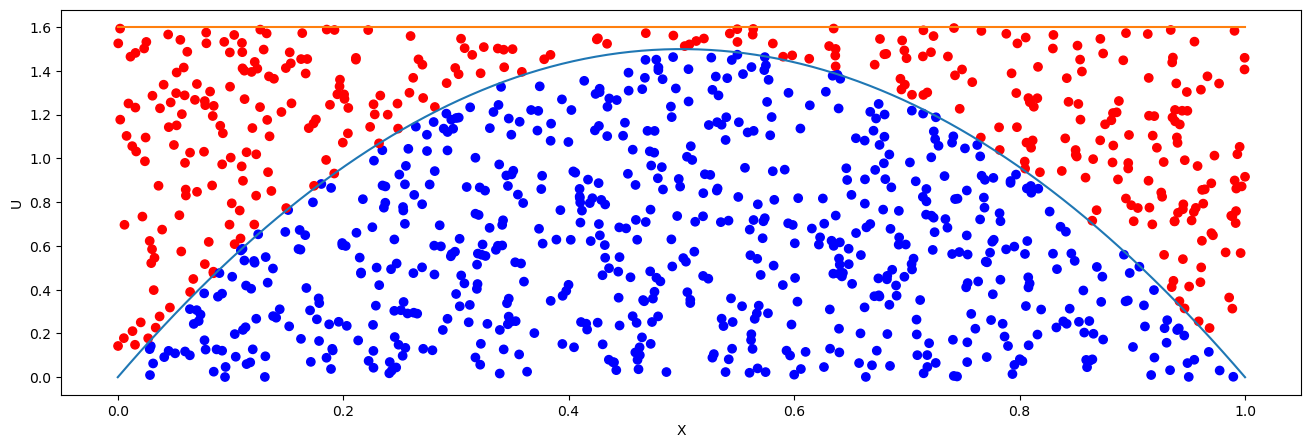

In [1]:
from scipy import stats; import numpy as np; import matplotlib.pyplot as plt
# distribution of interest
X,support = stats.beta(2,2),np.linspace(0,1,100); plt.figure(figsize=(16,5)); plt.plot(support, X.pdf(support))
# and distribution tilde_p(tilde_x) such that c*tilde_p(x)>p(x) for all x
tilde_X,n = stats.uniform(),1000; tilde_x = tilde_X.rvs(size=n)

c,u = 1.6, stats.uniform.rvs(size=n) # auxiliary stuff to do rejection sampling
plt.plot(support, c*tilde_X.pdf(support)); plt.xlabel('X'); plt.ylabel('U')
plt.scatter(tilde_x, c*u, color=['b' if u<(X.pdf(x)/c*tilde_X.pdf(x)) else 'r' for x,u in zip(tilde_x,u)]);

# 1.B Rejection Sampling: proof

> ***Rejection sampling*** changes the *univariate* sampling problem $X \sim f_\theta(x)$<br> into a *two-dimensional* problem $(\tilde X,U) \sim \tilde f(\tilde x,u) = \tilde f_{\tilde \theta}(\tilde x) \tilde f(u)$<br>that samples according to the desired probabilities

<br>

\begin{align*}
{Pr\left(\tilde X \leq x \;\big|\; U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)} & \color{white}{={} Pr\left(\tilde X \leq x, U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right) \Bigg/ Pr\left( U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)}\\
& \color{white}{={} \int_{-\infty}^{x} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x  \Bigg/  \int_{-\infty}^{\infty} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x} \\
& \color{white}{={} \int_{-\infty}^{x} {\frac{f_\theta(\tilde x)}{c }}  d\tilde x  \Bigg/  \int_{-\infty}^{\infty} {\frac{f_\theta(\tilde x)}{c }} d\tilde x  = \int_{-\infty}^{x} f_\theta(\tilde x) d\tilde x}\\\\
& \color{white}{={} F_\theta( x)}
\end{align*}


# 1.B Rejection Sampling: proof

> ***Rejection sampling*** changes the *univariate* sampling problem $X \sim f_\theta(x)$<br> into a *two-dimensional* problem $(\tilde X,U) \sim \tilde f(\tilde x,u) = \tilde f_{\tilde \theta}(\tilde x) \tilde f(u)$<br>that samples according to the desired probabilities

<br>

\begin{align*}
{Pr\left(\tilde X \leq x \;\big|\; U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)} & ={} Pr\left(\tilde X \leq x, U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right) \Bigg/ Pr\left( U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)\\
& \color{white}{={} \int_{-\infty}^{x} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x  \Bigg/  \int_{-\infty}^{\infty} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x} \\
& \color{white}{={} \int_{-\infty}^{x} {\frac{f_\theta(\tilde x)}{c }}  d\tilde x  \Bigg/  \int_{-\infty}^{\infty} {\frac{f_\theta(\tilde x)}{c }} d\tilde x  = \int_{-\infty}^{x} f_\theta(\tilde x) d\tilde x}\\\\
& \color{white}{={} F_\theta( x)}
\end{align*}


# 1.B Rejection Sampling: proof

> ***Rejection sampling*** changes the *univariate* sampling problem $X \sim f_\theta(x)$<br> into a *two-dimensional* problem $(\tilde X,U) \sim \tilde f(\tilde x,u) = \tilde f_{\tilde \theta}(\tilde x) \tilde f(u)$<br>that samples according to the desired probabilities

<br>

\begin{align*}
{Pr\left(\tilde X \leq x \;\big|\; U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)} & ={} Pr\left(\tilde X \leq x, U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right) \Bigg/ Pr\left( U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)\\
& ={} \int_{-\infty}^{x} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x  \Bigg/  \int_{-\infty}^{\infty} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x \\
& \color{white}{={} \int_{-\infty}^{x} {\frac{f_\theta(\tilde x)}{c }}  d\tilde x  \Bigg/  \int_{-\infty}^{\infty} {\frac{f_\theta(\tilde x)}{c }} d\tilde x  = \int_{-\infty}^{x} f_\theta(\tilde x) d\tilde x}\\\\
& \color{white}{={} F_\theta( x)}
\end{align*}


# 1.B Rejection Sampling: proof

> ***Rejection sampling*** changes the *univariate* sampling problem $X \sim f_\theta(x)$<br> into a *two-dimensional* problem $(\tilde X,U) \sim \tilde f(\tilde x,u) = \tilde f_{\tilde \theta}(\tilde x) \tilde f(u)$<br>that samples according to the desired probabilities

<br>

\begin{align*}
{Pr\left(\tilde X \leq x \;\big|\; U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)} & ={} Pr\left(\tilde X \leq x, U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right) \Bigg/ Pr\left( U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)\\
& ={} \int_{-\infty}^{x} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x  \Bigg/  \int_{-\infty}^{\infty} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x \\
& ={} \int_{-\infty}^{x} {\frac{f_\theta(\tilde x)}{c }}  d\tilde x  \Bigg/  \int_{-\infty}^{\infty} {\frac{f_\theta(\tilde x)}{c }} d\tilde x  = \int_{-\infty}^{x} f_\theta(\tilde x) d\tilde x\\\\
& \color{white}{={} F_\theta( x)}
\end{align*}


# 1.B Rejection Sampling: proof

> ***Rejection sampling*** changes the *univariate* sampling problem $X \sim f_\theta(x)$<br> into a *two-dimensional* problem $(\tilde X,U) \sim \tilde f(\tilde x,u) = \tilde f_{\tilde \theta}(\tilde x) \tilde f(u)$<br>that samples according to the desired probabilities

<br>

\begin{align*}
{Pr\left(\tilde X \leq x \;\big|\; U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)} & ={} Pr\left(\tilde X \leq x, U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right) \Bigg/ Pr\left( U \leq \frac{f_\theta(\tilde X)}{c \tilde f_{\tilde \theta}(\tilde X)} \right)\\
& ={} \int_{-\infty}^{x} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x  \Bigg/  \int_{-\infty}^{\infty} \int_{0}^{\frac{f_\theta(\tilde x)}{c \tilde f_{\tilde \theta}(\tilde x)}} \tilde f_{\tilde \theta}(\tilde x) \;du\; d\tilde x \\
& ={} \int_{-\infty}^{x} {\frac{f_\theta(\tilde x)}{c }}  d\tilde x  \Bigg/  \int_{-\infty}^{\infty} {\frac{f_\theta(\tilde x)}{c }} d\tilde x  = \int_{-\infty}^{x} f_\theta(\tilde x) d\tilde x\\\\
& ={} F_\theta( x)
\end{align*}


<a name="cell-importanceSampling"></a>

# 1.C Importance Sampling ([Return to TOC](#cell-TOC-Sampling)) 

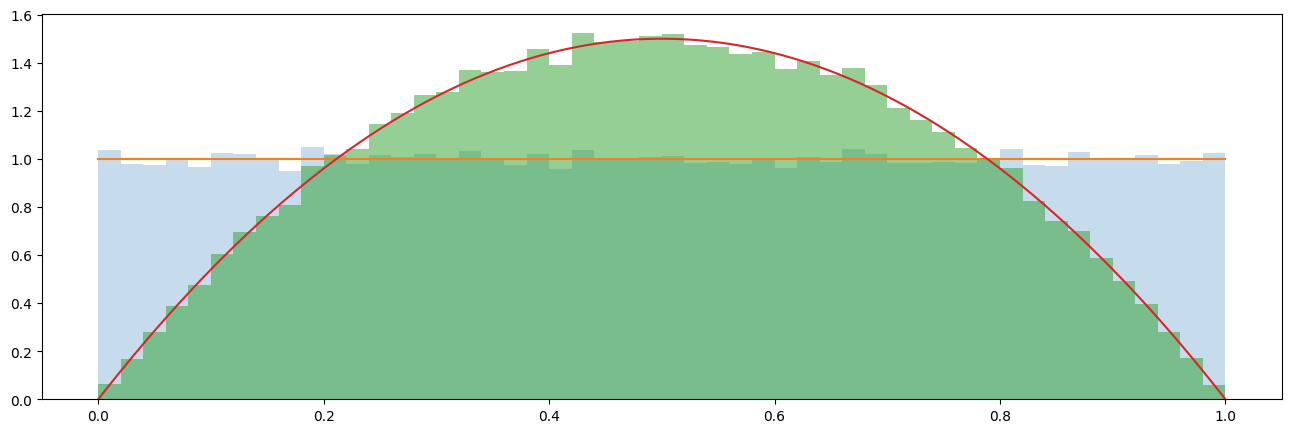

In [3]:
# the importance sampling distribution tilde_p(tilde_x)
tilde_X,n = stats.uniform(),100000
tilde_x = tilde_X.rvs(size=n)

# the target distribution p(x)
X = stats.beta(2,2)
w = X.pdf(tilde_x)/tilde_X.pdf(tilde_x) #            What is happening here?
w = w/w.sum() #                                      What is happening here?

support = np.linspace(0,1,100)
plt.figure(figsize=(16,5)); plt.hist(tilde_x, density=True, bins=50, alpha=0.25); plt.plot(support, tilde_X.pdf(support)); 
plt.hist(tilde_x, weights=w, density=True, bins=50, alpha=0.5); plt.plot(support, X.pdf(support));


# 1.C Importance Sampling  

In providing weighted samples, ***importance sampling*** does not "sample" from a desired ***target distribution***; rather, it is representative of the ***target distribution*** in the sense that 
<br><br><font style="color:navy;">***unnormalized importance sampling*** provides ***unbiased estimation***</font>

<font style="color:white;">
because $\quad \frac{1}{n}\sum_{i=1}^n g(x_i)  \quad \text{ for } \quad X_i \sim f_{\theta}(x_i)$ 

$$\text{estimates}\quad E_{X\sim f_\theta(x)}[g(X)] \; = \int g(x) f(x) dx \color{white}{= \int g(x) \frac{f_\theta(x)}{\tilde f_{\tilde \theta}(x)} \tilde f_{\tilde \theta}(x) dx = E_{\tilde X\sim \tilde f_{\tilde \theta}(\tilde x)}[g(\tilde X)]}$$


then so too $\quad \frac{1}{n}\sum_{i=1}^n g(\tilde x_i) \frac{f_\theta(\tilde x_i)}{\tilde f_{\tilde \theta}(\tilde x_i)} \quad \text{ for } \quad \tilde X_i \sim \tilde f_{\tilde \theta}(\tilde x_i)$

$$\text{estimates}\quad E_{X\sim f_\theta(x)}[g(X)] \; = \int g(x) f(x) dx = \int g(x) \frac{f_\theta(x)}{\tilde f_{\tilde \theta}(x)} \tilde f_{\tilde \theta}(x) dx = E_{\tilde X\sim \tilde f_{\tilde \theta}(\tilde x)}[g(\tilde X)]$$
</font>



# 1.C Importance Sampling  

In providing weighted samples, ***importance sampling*** does not "sample" from a desired ***target distribution***; rather, it is representative of the ***target distribution*** in the sense that 
<br><br><font style="color:navy;">***unnormalized importance sampling*** provides ***unbiased estimation***</font>

because $\quad \frac{1}{n}\sum_{i=1}^n g(x_i)  \quad \text{ for } \quad X_i \sim f_{\theta}(x_i)$ 

$$\text{estimates}\quad E_{X\sim f_\theta(x)}[g(X)] \; = \int g(x) f(x) dx \color{white}{= \int g(x) \frac{f_\theta(x)}{\tilde f_{\tilde \theta}(x)} \tilde f_{\tilde \theta}(x) dx = E_{\tilde X\sim \tilde f_{\tilde \theta}(\tilde x)}[g(\tilde X)]}$$


then so too $\quad \frac{1}{n}\sum_{i=1}^n g(\tilde x_i) \frac{f_\theta(\tilde x_i)}{\tilde f_{\tilde \theta}(\tilde x_i)} \quad \text{ for } \quad \tilde X_i \sim \tilde f_{\tilde \theta}(\tilde x_i)$

$$\text{estimates}\quad E_{X\sim f_\theta(x)}[g(X)] \; = \int g(x) f(x) dx = \int g(x) \frac{f_\theta(x)}{\tilde f_{\tilde \theta}(x)} \tilde f_{\tilde \theta}(x) dx = E_{\tilde X\sim \tilde f_{\tilde \theta}(\tilde x)}[g(\tilde X)]$$






# 1.C Importance Sampling

***Importance sampling*** allows us to pursue estimation with ***proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x) \neq f_{\theta}(x)$ but using all samples <font style="color:gray;">(rather than filtering ***proposal distribution*** samples like ***rejection sampling***)</font> but requires ***importance weights*** $W_i^* = \frac{f(\tilde X_i)}{\tilde f(\tilde X_i)}$

<font style="color:white;">
Rather than using the raw ***importance weights***, ***normalized importance weights*** can be used

$$W_i^* = \frac{f(\tilde X_i)}{\tilde f(\tilde X_i)} \quad \text{ and } \quad W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*}$$
</font

- <font style="color:white;">***Normalized importance weights*** will introduce some **bias** into the **estimation**</font>
- <font style="color:white;">But it also means that the ***target distribution*** only needs to be known up to a proportionality constant $\color{white}{f_{\theta} (x) = cg(x)}$ since this cancels upon ***normalization***</font>

<font style="color:white;">
$$\require{cancel}\color{white}{W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*} = \frac{ f(\tilde X_i)/\tilde f(\tilde X_i)}{\sum_{i=1}^n  f(\tilde X_i)/\tilde f(\tilde X_i)} = \frac{ \cancel{c}g(\tilde X_i)/\tilde f(\tilde X_i)}{\sum_{i=1}^n  \cancel{c}g(\tilde X_i)/\tilde f(\tilde X_i)}}$$
</font>
    
<br>



# 1.C Importance Sampling

***Importance sampling*** allows us to pursue estimation with ***proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x) \neq f_{\theta}(x)$ but using all samples <font style="color:gray;">(rather than filtering ***proposal distribution*** samples like ***rejection sampling***)</font> but requires ***importance weights*** $W_i^* = \frac{f(\tilde X_i)}{\tilde f(\tilde X_i)}$


Rather than using the raw ***importance weights***, ***normalized importance weights*** can be used

$$W_i^* = \frac{f(\tilde X_i)}{\tilde f(\tilde X_i)} \quad \text{ and } \quad W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*}$$


- <font style="color:white;">***Normalized importance weights*** will introduce some **bias** into the **estimation**</font>
- <font style="color:white;">But it also means that the ***target distribution*** only needs to be known up to a proportionality constant $\color{white}{f_{\theta} (x) = cg(x)}$ since this cancels upon ***normalization***</font>

<font style="color:white;">
$$\require{cancel}\color{white}{W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*} = \frac{ f(\tilde X_i)/\tilde f(\tilde X_i)}{\sum_{i=1}^n  f(\tilde X_i)/\tilde f(\tilde X_i)} = \frac{ \cancel{c}g(\tilde X_i)/\tilde f(\tilde X_i)}{\sum_{i=1}^n  \cancel{c}g(\tilde X_i)/\tilde f(\tilde X_i)}}$$
</font>
    
<br>



# 1.C Importance Sampling

***Importance sampling*** allows us to pursue estimation with ***proposal distribution*** $\tilde f_{\tilde \theta} (\tilde x) \neq f_{\theta}(x)$ but using all samples <font style="color:gray;">(rather than filtering ***proposal distribution*** samples like ***rejection sampling***)</font> but requires ***importance weights*** $W_i^* = \frac{f(\tilde X_i)}{\tilde f(\tilde X_i)}$


Rather than using the raw ***importance weights***, ***normalized importance weights*** can be used

$$W_i^* = \frac{f(\tilde X_i)}{\tilde f(\tilde X_i)} \quad \text{ and } \quad W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*}$$

- ***Normalized importance weights*** will introduce some **bias** into the **estimation**
- But it also means that the ***target distribution*** only needs to be known up to a proportionality constant $\color{blue}{f_{\theta} (x) = cg(x)}$ since this cancels upon ***normalization***


$$\require{cancel}\color{navy}{W_i = \frac{ W_i^*}{\sum_{i=1}^n  W_i^*} = \frac{ f(\tilde X_i)/\tilde f(\tilde X_i)}{\sum_{i=1}^n  f(\tilde X_i)/\tilde f(\tilde X_i)} = \frac{ \cancel{c}g(\tilde X_i)/\tilde f(\tilde X_i)}{\sum_{i=1}^n  \cancel{c}g(\tilde X_i)/\tilde f(\tilde X_i)}}$$

<br>

# 1.C Importance Sampling 


> In Bayesian analysis a posterior can be evaluated proportionally as
>
> $$p(\theta | \mathbf{x}) \propto f(\mathbf{x}|\theta) p(\theta) \quad \text{(no  normalizing constant)}$$
>
> when computing the **marginal likelihood** denomenator $f(\textbf{x})$ is too expensive.

<br>

<font style="color:white;">**Importance sampling weights** are the normalized values of the likelihood if</font> 

| <font style="color:white;">Target Distribution</font> | <font style="color:white;">Proposal Distribution</font> |
|-|-|
| posterior distribution $p(\theta | \mathbf{x})$ | prior distribution $p(\theta)$|
<br>

$$\require{cancel}\color{white}{
\text{ since } 
W_i^* = \frac{p(\theta_i | \mathbf{x})}{p(\theta_i)} = \frac{\frac{f(\mathbf{x}|\theta_i) \cancel{p(\theta_i)}}{f(\mathbf{x})}}{\cancel{p(\theta_i)}} = \frac{f(\mathbf{x}|\theta_i)}{f(\mathbf{x})} \approx \frac{f(\mathbf{x}|\theta_i)}{\sum_i f(\mathbf{x}|\theta_i)} = W_i}
$$
 

# 1.C Importance Sampling 


> In Bayesian analysis a posterior can be evaluated proportionally as
>
> $$p(\theta | \mathbf{x}) \propto f(\mathbf{x}|\theta) p(\theta) \quad \text{(no  normalizing constant)}$$
>
> when computing the **marginal likelihood** denomenator $f(\textbf{x})$ is too expensive.

<br>

**Importance sampling weights** are the normalized values of the likelihood if

| Target Distribution | Proposal Distribution |
|-|-|
| posterior distribution $p(\theta | \mathbf{x})$ | prior distribution $p(\theta)$|
<br>

$$\require{cancel}\color{white}{
\text{ since } 
W_i^* = \frac{p(\theta_i | \mathbf{x})}{p(\theta_i)} = \frac{\frac{f(\mathbf{x}|\theta_i) \cancel{p(\theta_i)}}{f(\mathbf{x})}}{\cancel{p(\theta_i)}} = \frac{f(\mathbf{x}|\theta_i)}{f(\mathbf{x})} \approx \frac{f(\mathbf{x}|\theta_i)}{\sum_i f(\mathbf{x}|\theta_i)} = W_i}
$$
 

# 1.C Importance Sampling 


> In Bayesian analysis a posterior can be evaluated proportionally as
>
> $$p(\theta | \mathbf{x}) \propto f(\mathbf{x}|\theta) p(\theta) \quad \text{(no  normalizing constant)}$$
>
> when computing the **marginal likelihood** denomenator $f(\textbf{x})$ is too expensive.

<br>

**Importance sampling weights** are the normalized values of the likelihood if

| Target Distribution | Proposal Distribution |
|-|-|
| posterior distribution $p(\theta | \mathbf{x})$ | prior distribution $p(\theta)$|
<br>

$$\require{cancel}
\text{ since } 
W_i^* = \frac{p(\theta_i | \mathbf{x})}{p(\theta_i)} = \color{white}{\frac{\frac{f(\mathbf{x}|\theta_i) \cancel{p(\theta_i)}}{f(\mathbf{x})}}{\cancel{p(\theta_i)}} = \frac{f(\mathbf{x}|\theta_i)}{f(\mathbf{x})} \approx \frac{f(\mathbf{x}|\theta_i)}{\sum_i f(\mathbf{x}|\theta_i)} = W_i}
$$
 

# 1.C Importance Sampling 


> In Bayesian analysis a posterior can be evaluated proportionally as
>
> $$p(\theta | \mathbf{x}) \propto f(\mathbf{x}|\theta) p(\theta) \quad \text{(no  normalizing constant)}$$
>
> when computing the **marginal likelihood** denomenator $f(\textbf{x})$ is too expensive.

<br>

**Importance sampling weights** are the normalized values of the likelihood if

| Target Distribution | Proposal Distribution |
|-|-|
| posterior distribution $p(\theta | \mathbf{x})$ | prior distribution $p(\theta)$|
<br>

$$\require{cancel}
\text{ since } 
W_i^* = \frac{p(\theta_i | \mathbf{x})}{p(\theta_i)} = \frac{\frac{f(\mathbf{x}|\theta_i) \cancel{p(\theta_i)}}{f(\mathbf{x})}}{\cancel{p(\theta_i)}} = \frac{f(\mathbf{x}|\theta_i)}{f(\mathbf{x})} \approx \color{white}{\frac{f(\mathbf{x}|\theta_i)}{\sum_i f(\mathbf{x}|\theta_i)} = W_i}
$$
 

# 1.C Importance Sampling 


> In Bayesian analysis a posterior can be evaluated proportionally as
>
> $$p(\theta | \mathbf{x}) \propto f(\mathbf{x}|\theta) p(\theta) \quad \text{(no  normalizing constant)}$$
>
> when computing the **marginal likelihood** denomenator $f(\textbf{x})$ is too expensive.

<br>

**Importance sampling weights** are the normalized values of the likelihood if

| Target Distribution | Proposal Distribution |
|-|-|
| posterior distribution $p(\theta | \mathbf{x})$ | prior distribution $p(\theta)$|
<br>

$$\require{cancel}
\text{ since } 
W_i^* = \frac{p(\theta_i | \mathbf{x})}{p(\theta_i)} = \frac{\frac{f(\mathbf{x}|\theta_i) \cancel{p(\theta_i)}}{f(\mathbf{x})}}{\cancel{p(\theta_i)}} = \frac{f(\mathbf{x}|\theta_i)}{f(\mathbf{x})} \approx \frac{f(\mathbf{x}|\theta_i)}{\sum_i f(\mathbf{x}|\theta_i)} = W_i
$$
 